In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt
import numpy as np 
%matplotlib inline

In [4]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 7s 2us/step


In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

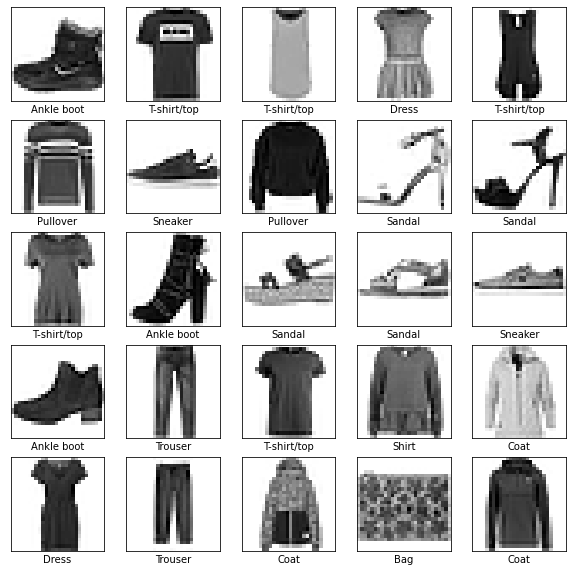

In [6]:
train_images = train_images / 255.0

test_images = test_images / 255.0
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [9]:
model = keras.Sequential(
[
    layers.Flatten(input_shape=[28, 28]),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [17]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.2806 - accuracy: 0.8964
Epoch 2/10
60000/60000 [==============================] - 3s 57us/sample - loss: 0.2679 - accuracy: 0.9000
Epoch 3/10
60000/60000 [==============================] - 3s 57us/sample - loss: 0.2549 - accuracy: 0.9043
Epoch 4/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.2472 - accuracy: 0.9086
Epoch 5/10
60000/60000 [==============================] - 3s 57us/sample - loss: 0.2390 - accuracy: 0.9107
Epoch 6/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.2285 - accuracy: 0.9145
Epoch 7/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.2220 - accuracy: 0.9165
Epoch 8/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.2164 - accuracy: 0.9184
Epoch 9/10
60000/60000 [==============================] - 4s 62us/sample - loss: 0.2082 - accuracy: 0.9225
Epoch 10/10
60

In [18]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 54us/sample - loss: 0.3671 - accuracy: 0.8811


[0.36706143074035646, 0.8811]

In [19]:
predictions = model.predict(test_images)
print(predictions[0])
print(np.argmax(predictions[0]))
print(test_labels[0])

[7.1399185e-11 1.0083135e-11 6.0115047e-12 4.6653914e-15 2.0608419e-12
 7.6563781e-05 4.5496640e-12 6.0688966e-04 8.6029822e-10 9.9931657e-01]
9
9


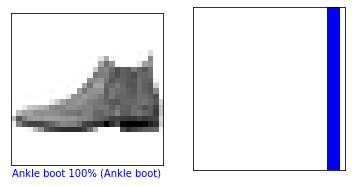

In [20]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

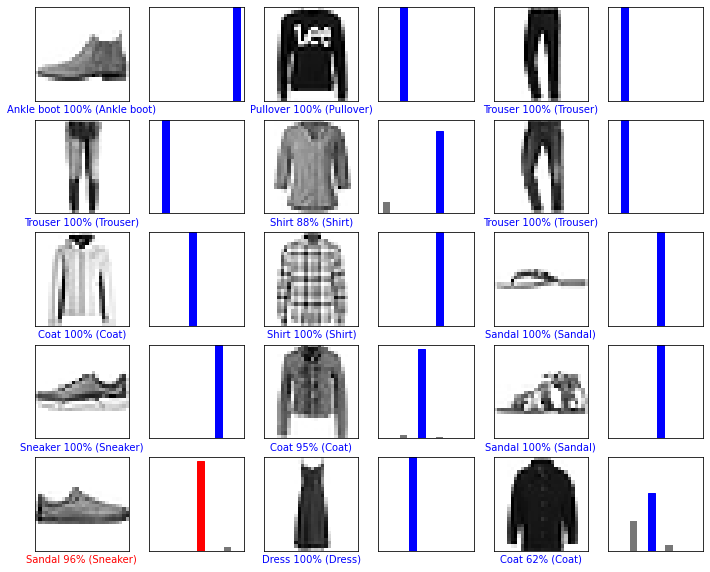

In [21]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

(1, 28, 28)
[[7.1399324e-11 1.0083154e-11 6.0115047e-12 4.6653914e-15 2.0608459e-12
  7.6563781e-05 4.5496814e-12 6.0689019e-04 8.6029822e-10 9.9931657e-01]]


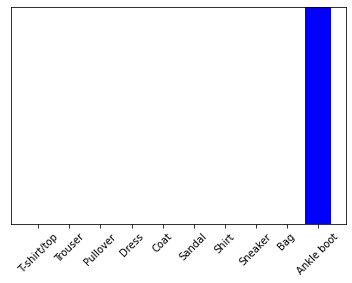

In [22]:
img = test_images[0]

img = (np.expand_dims(img,0))

print(img.shape)
predictions_single = model.predict(img)

print(predictions_single)
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)